# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


SOLTION

The learning rate determines the size of each update step in Stochastic Gradient Descent.

If the learning rate is too high, the algorithm may overshoot the minimum, causing the loss to oscillate or even diverge.
If it is too low, the convergence becomes very slow and the model might get stuck on flat regions of the loss surface.
A well-chosen learning rate leads to stable and efficient convergence.

Common Strategies for Choosing or Adapting the Learning Rate

> Manual tuning / trying fixed values:
Choose a rate (e.g., 0.1, 0.01, 0.001) based on experiments with the loss curve.

> Learning rate schedules:
Reduce the learning rate during training to allow fast initial learning and fine adjustment later.
Examples: step decay, exponential decay, 1/t decay.

> Adaptive methods:
Algorithms like AdaGrad, RMSProp, and Adam automatically adjust the learning rate for each parameter based on past gradients.

> Warm-up:
Start with a small learning rate and gradually increase it in the first few iterations to avoid unstable early updates.

> Cyclical learning rates:
The learning rate oscillates between a minimum and maximum value, helping the optimizer escape sharp minima


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess dataset
df=pd.read_csv(r"C:\Users\Hp\Downloads\Real estate.csv")
df=df.drop(columns=["No"])

X=df.drop(columns=["Y house price of unit area"]).values
y=df["Y house price of unit area"].values.reshape(-1, 1)

scalerX=StandardScaler()
scalery=StandardScaler()
X=scalerX.fit_transform(X)
y=scalery.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

# Batch Gradient Descent
def gradient_descent(X, y, lr=0.01, epochs=500):
    m,n=X.shape
    W=np.zeros((n, 1))
    b=0
    for _ in range(epochs):
        y_pred = X.dot(W) + b
        error = y_pred - y
        dW = (1/m) * X.T.dot(error)
        db = (1/m) * np.sum(error)
        W -= lr * dW
        b -= lr * db
    return W, b

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, lr=0.01, epochs=20):
    m, n=X.shape
    W=np.zeros((n, 1))
    b=0
    for _ in range(epochs):
        for i in range(m):
            xi = X[i].reshape(1, -1)
            yi = y[i]
            y_pred = xi.dot(W) + b
            error = y_pred - yi
            W -= lr * xi.T * error
            b -= lr * error
    return W, b

# Train both models
W_gd, b_gd = gradient_descent(X_train, y_train, lr=0.01, epochs=500)
W_sgd, b_sgd = stochastic_gradient_descent(X_train, y_train, lr=0.01, epochs=20)

# Predict on test set
y_pred_gd=X_test.dot(W_gd) + b_gd
y_pred_sgd=X_test.dot(W_sgd) + b_sgd

# Inverse transform for evaluation
y_test_inv=scalery.inverse_transform(y_test)
y_pred_gd_inv=scalery.inverse_transform(y_pred_gd)
y_pred_sgd_inv=scalery.inverse_transform(y_pred_sgd)

# Metrics
mse_gd=mean_squared_error(y_test_inv, y_pred_gd_inv)
r2_gd=r2_score(y_test_inv, y_pred_gd_inv)

mse_sgd=mean_squared_error(y_test_inv, y_pred_sgd_inv)
r2_sgd=r2_score(y_test_inv, y_pred_sgd_inv)

print("Batch GD → MSE:", mse_gd, " R²:", r2_gd)
print("SGD → MSE:", mse_sgd, " R²:", r2_sgd)


Batch GD → MSE: 52.759689047142885  R²: 0.6855044742824197
SGD → MSE: 55.68435047800321  R²: 0.668070843590956


For Changing Learning Rate / Epochs for SGD

We can modify this line:
W_sgd, b_sgd = stochastic_gradient_descent(X_train, y_train, lr=0.005, epochs=100)


Small LR + more epochs → smoother, slower
Large LR + few epochs → more noisy training

Why Does SGD Behave More Erratically Than GD?

Stochastic Gradient Descent (SGD) updates the model parameters using one training example at a time.
Because each data point can have a slightly different gradient direction, every update “pulls” the weights in a new direction. This causes the optimization path to zig-zag, making it appear noisy and unstable.

In contrast, Batch Gradient Descent (GD) uses the entire dataset to compute the gradient for each update.
Since the gradient is averaged over all samples, the direction of descent is much more accurate and consistent, resulting in a smooth, stable, and steady path toward the minimum.

Why SGD Is Still Preferred for Very Large Datasets

Despite its noisy behavior, SGD has several advantages:

1. Much Faster Training
SGD updates after every single sample, so it starts learning immediately. GD must process the entire dataset before each update, which becomes very slow for large datasets.
2. Scales to Very Large Data
SGD can handle millions of samples efficiently. GD becomes impractical because each update requires computing gradients over all samples.
3. Noise Can Be Helpful
The randomness in SGD prevents it from getting stuck in shallow local minima or plateaus, especially in deep learning. This can lead to better generalization.

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction




SOLUTION

a) Supervised or Unsupervised?

A Decision Tree is a supervised learning algorithm because it learns patterns using labeled data (features + class labels).

b) What is entropy?

In decision trees, entropy measures the impurity or uncertainty of a node.
Higher entropy ⇒ more mixed classes;
Lower entropy ⇒ purer node.

c) What does reduction in entropy signify?

Reduction in entropy (information gain) shows how much purity improves after a split.
Higher reduction ⇒ better split ⇒ children are purer.

d) Entropy-Based Split Selection
    1. Entropy of the Root Node

There are 5 positive (+) and 5 negative (−) examples.

𝐻 root= −5/10 log(base2)(5/10) - 5/10 log(base2)(5/10) = 1.00 
⁡
2. Entropy Calculations for Each Split
Split 1: (x ≤ −2 ?)

Left child: 1 sample (all −) → entropy = 0.00

Right child: 9 samples (5 +, 4 −) → entropy = 0.99

Weighted entropy:

𝐻 split=1/10(0.00)+910(0.99)=0.89

Reduction in entropy: 1.00−0.89=0.11
Split 2: (x ≤ 2 ?)

Left child: 9 samples (5 +, 4 −) → entropy = 0.99

Right child: 1 sample (all −) → entropy = 0.00

Weighted entropy:

𝐻 split=0.89

Reduction in entropy: 1.00−0.89=0.11
Split 3: (y ≤ 2 ?)

Left child: 5 samples (4 +, 1 −) → entropy = 0.72

Right child: 5 samples (1 +, 4 −) → entropy = 0.72

Weighted entropy:

H split=0.72

Reduction in entropy:1.00−0.72=0.28
3. Choosing the Best Split
Split Condition	Weighted Entropy	Entropy Reduction
x ≤ −2	0.89	0.11
x ≤ 2	0.89	0.11
y ≤ 2	0.72	0.28
Final Answer
The best split is: (y ≤ 2 ?) because it produces the highest entropy reduction of 0.28, resulting in the purest child nodes.

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


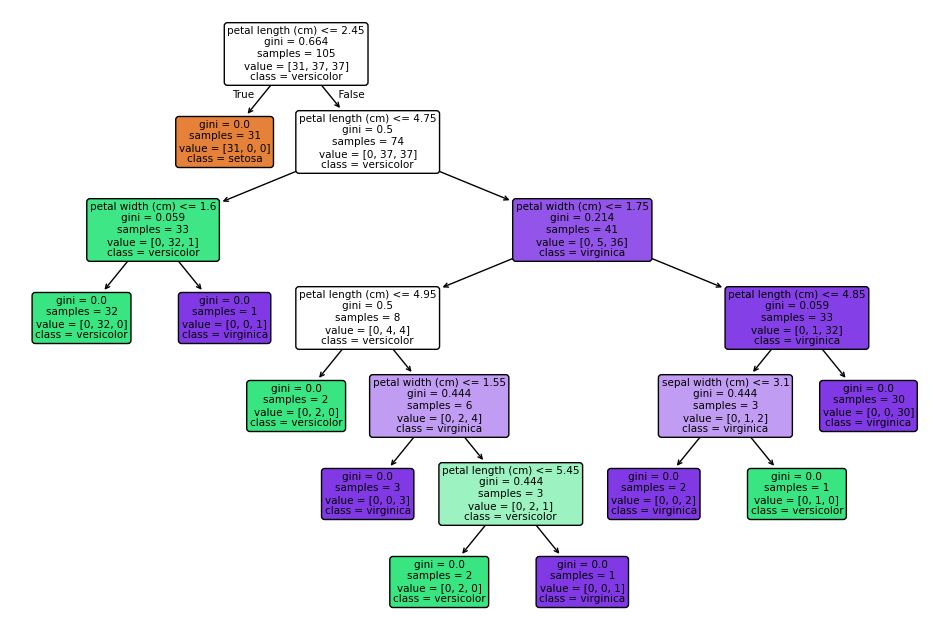

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris=load_iris()
X,y=iris.data,iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.show()


# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



SOLUTION

a) Is SVM supervised or unsupervised?

A Support Vector Machine (SVM) is a supervised learning algorithm because it learns a decision boundary using labeled training data (features along with class labels).

b) What is a margin in SVM? Why maximize it?

The margin is the distance between the decision boundary (hyperplane) and the closest data points from each class.
SVM aims to maximize the margin because:
A larger margin leads to better generalization on unseen data.
It makes the classifier more robust to noise and small variations in the training data.

c) What are support vectors? Why are they important?

Support vectors are the data points that lie closest to the separating hyperplane.
They are important because:
They directly determine the position and orientation of the decision boundary.
Removing non–support vector points does not affect the hyperplane, but removing support vectors changes the classifier.

d) What is the purpose of a kernel function? Give two examples.

A kernel function allows SVM to operate in a high-dimensional feature space without explicitly computing the transformation.
This enables SVM to learn non-linear decision boundaries.
Two commonly used kernel functions:
Polynomial kernel
Radial Basis Function (RBF) kernel
(Other examples: Linear kernel, Sigmoid kernel)

### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

SOLUTION

a) How does SVM choose the optimal separating hyperplane in a linearly separable dataset?

For linearly separable data, SVM selects the hyperplane that maximizes the margin, i.e., the distance between the hyperplane and the nearest data points from each class (support vectors).
Out of infinitely many possible separating hyperplanes, SVM chooses the one with the maximum margin, as this gives the best generalization to unseen data.

b) What if the data is not linearly separable?

When the data is not perfectly separable:

Soft Margin SVM
SVM allows certain points to be misclassified using slack variables. This creates a trade-off between maximizing the margin and minimizing classification errors.

Kernel Trick
SVM maps the data to a higher-dimensional space using a kernel function.
In this transformed space, the classes may become linearly separable even if they were not separable in the original space.

Thus, SVM can handle non-linear boundaries effectively.

c) Role of the Regularization Parameter C

The parameter C controls the trade-off between maximizing the margin and minimizing classification errors.

When C is very large:
SVM tries to avoid misclassifications at all costs.
Leads to a smaller margin and a hyperplane that tightly fits the training data.
Risk of overfitting.

When C is very small:

SVM allows more misclassifications to achieve a larger margin.
Prioritizes generalization over perfect correctness.
Risk of underfitting if C is too small.